In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

Завантажуємо датасет

In [16]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Дивимось данні

In [17]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(train_data[0].shape)
print(type(train_data[0]))
print(train_labels[0])
print(type(train_labels[0]))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(28, 28)
<class 'numpy.ndarray'>
9
<class 'numpy.uint8'>


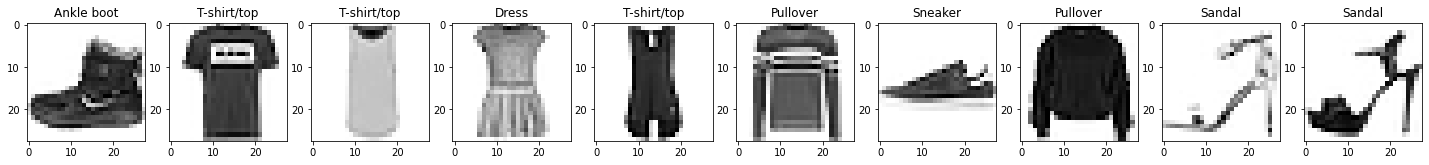

In [18]:
fig, ax = plt.subplots(1, 10)
fig.set_figwidth(25)

for i, img in enumerate(train_data[:10]):
  ax[i].imshow(img, cmap='Greys')
  ax[i].title.set_text(names[train_labels[i]])


Підготовуємо данні

In [19]:
# image_size = train_data.shape[1]
# input_size = image_size * image_size

# train_data = np.reshape(train_data, [-1, input_size]).astype('float32') / 255.
# test_data = np.reshape(test_data, [-1, input_size]).astype('float32') / 255.

train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


In [20]:
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [21]:
print(test_data[5].shape)
print(test_labels[5])
print(list(test_labels[5]).index(1)+1)

(28, 28)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2


Створюємо модель

In [22]:
nn = Sequential()
nn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
nn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
nn.add(MaxPooling2D((2, 2)))
nn.add(Dropout(0.2))
nn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
nn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
nn.add(MaxPooling2D((2, 2)))
nn.add(Dropout(0.2))
nn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
nn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
nn.add(MaxPooling2D((2, 2)))
nn.add(Dropout(0.2))
nn.add(Flatten())
nn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
nn.add(Dropout(0.3))
nn.add(Dense(10, activation='softmax'))

nn.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

Тренуємо модель:

In [23]:
history = nn.fit(
    train_data,
    train_labels,
    epochs=100,
    batch_size=64,
    validation_data=(test_data, test_labels)
)

Epoch 1/100
938/938 [==============================] - 11s 12ms/step - loss: 0.9650 - accuracy: 0.6478 - val_loss: 0.5566 - val_accuracy: 0.7951
Epoch 2/100
938/938 [==============================] - 9s 9ms/step - loss: 0.5941 - accuracy: 0.7800 - val_loss: 0.4702 - val_accuracy: 0.8251
Epoch 3/100
938/938 [==============================] - 7s 8ms/step - loss: 0.5171 - accuracy: 0.8114 - val_loss: 0.4174 - val_accuracy: 0.8466
Epoch 4/100
938/938 [==============================] - 7s 8ms/step - loss: 0.4674 - accuracy: 0.8301 - val_loss: 0.3911 - val_accuracy: 0.8576
Epoch 5/100
938/938 [==============================] - 8s 8ms/step - loss: 0.4319 - accuracy: 0.8417 - val_loss: 0.3634 - val_accuracy: 0.8677
Epoch 6/100
938/938 [==============================] - 7s 8ms/step - loss: 0.4056 - accuracy: 0.8524 - val_loss: 0.3410 - val_accuracy: 0.8750
Epoch 7/100
938/938 [==============================] - 7s 8ms/step - loss: 0.3848 - accuracy: 0.8600 - val_loss: 0.3393 - val_accuracy: 0.87

In [26]:
score = nn.evaluate(test_data, test_labels)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.1967 - accuracy: 0.9360
Test loss: 0.1966794729232788
Test accuracy: 93.60%


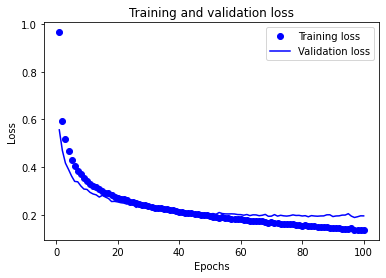

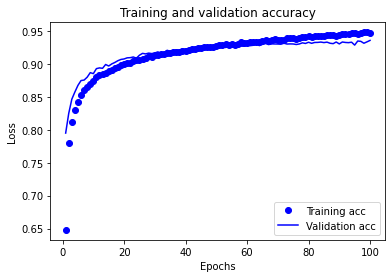

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()